In [1]:
!pip install opencv-python


In [2]:
import numpy as np
import cv2

In [25]:
img = cv2.imread('three.jpg')
img = cv2.resize(img, (640, 800))

In [26]:
from google.colab.patches import cv2_imshow

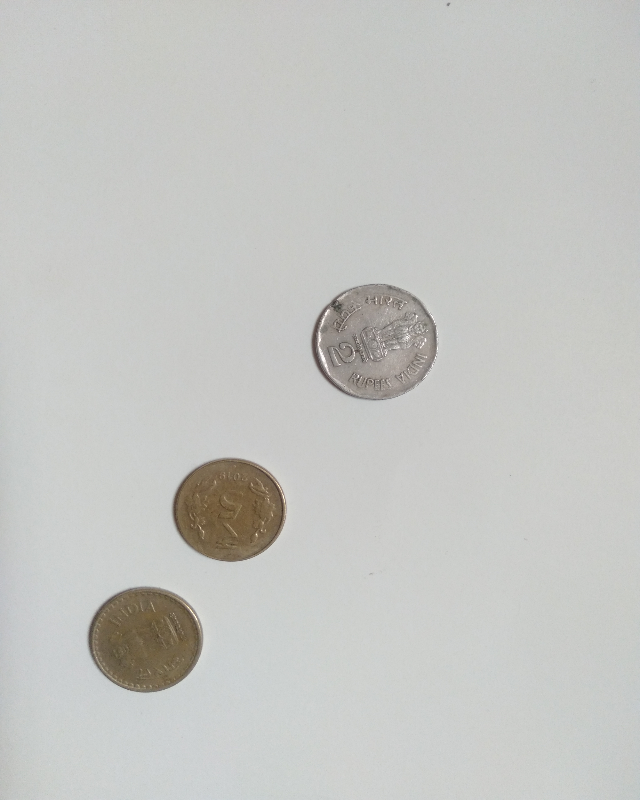

In [27]:
cv2_imshow(img)

In [28]:
#copy for later use
img_copy = img.copy()

In [29]:
img = cv2.GaussianBlur(img, (7, 7), 3)

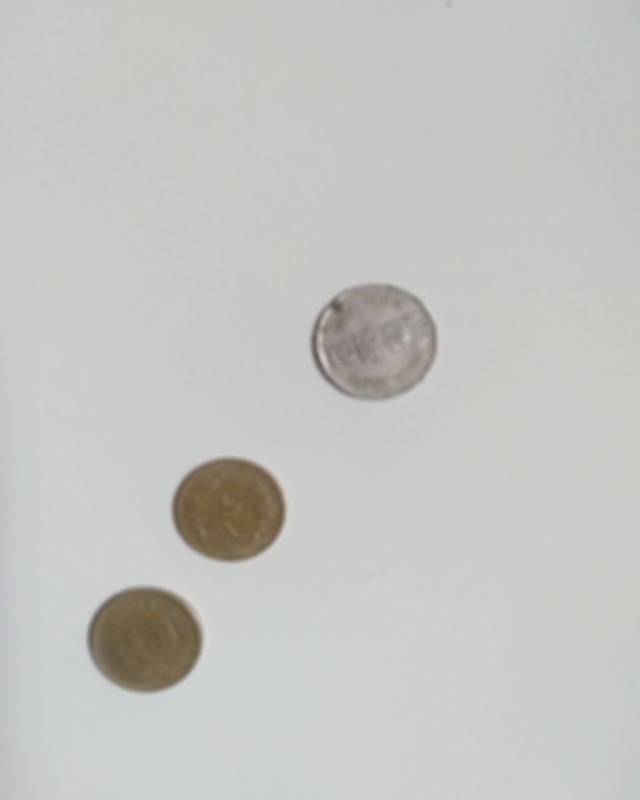

In [30]:
cv2_imshow(img)

In [31]:
#convert it into a grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)

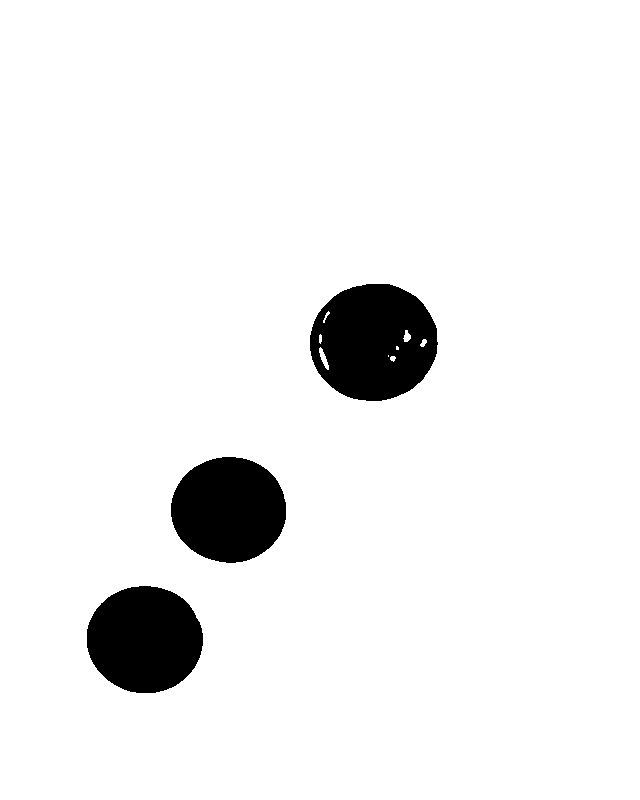

In [32]:
#show the image again
cv2_imshow(thresh)

In [33]:
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
image_copy = cv2.drawContours(img_copy, contours, -1, (0, 255, 0), 3)

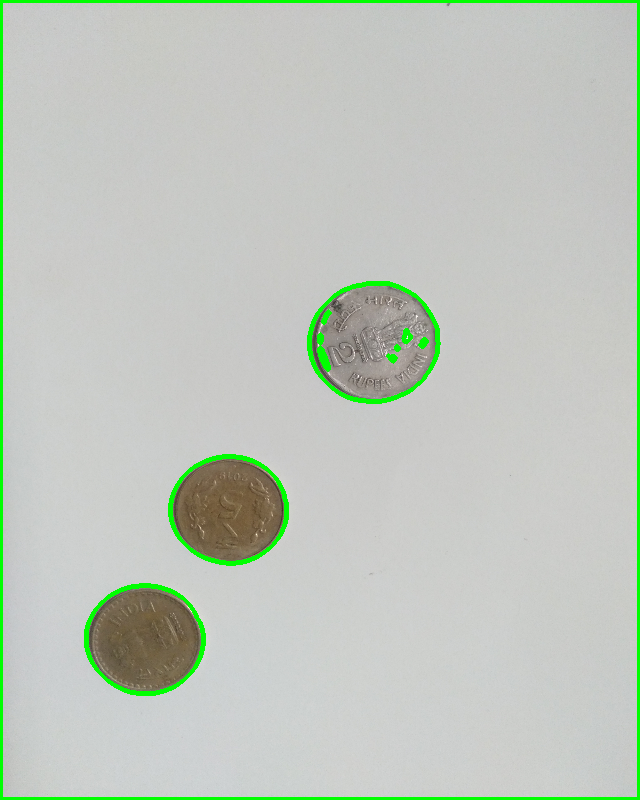

In [34]:
cv2_imshow(image_copy)

In [35]:
area = {}
for contour in range(len(contours)):
  cnt = contours[contour]
  ar = cv2.contourArea(cnt)
  area[contour] = ar
  print(ar)

510561.0
9926.0
9730.5
11960.5
18.0
0.0
75.5
5.5
26.0
15.0
47.5
15.5


In [36]:
#sorting the areas
sorted_area = sorted(area.items(), key=lambda x: x[1], reverse=True)
results = np.array(sorted_area).astype('int32')
print(results)

[[     0 510561]
 [     3  11960]
 [     1   9926]
 [     2   9730]
 [     6     75]
 [    10     47]
 [     8     26]
 [     4     18]
 [    11     15]
 [     9     15]
 [     7      5]
 [     5      0]]


In [37]:
num = np.argwhere(results[:, 1] > 500).shape[0]
print(num)

4


Number of coins is  3


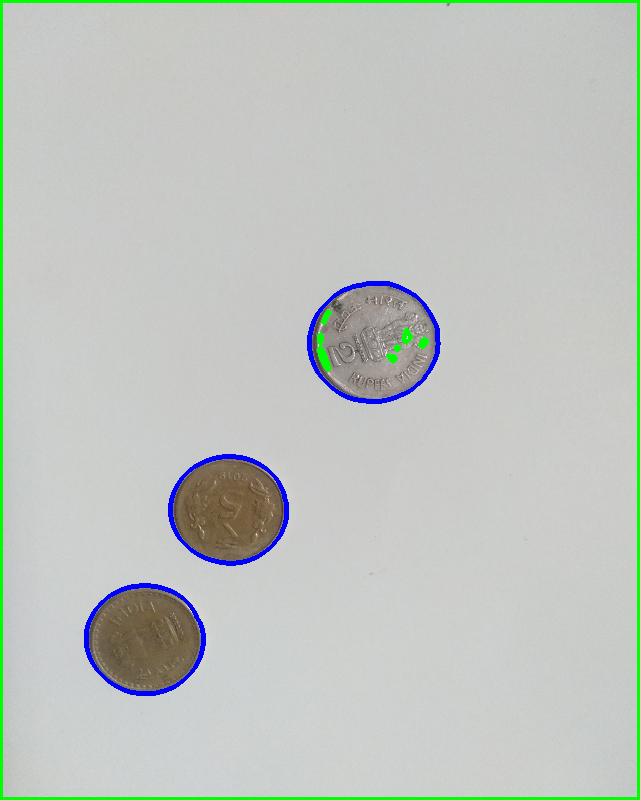

In [40]:
for i in range(1, num):
  image_copy = cv2.drawContours(img_copy, contours, results[i, 0], (255, 0, 0), 3)

print("Number of coins is ", num-1)
cv2_imshow(image_copy)